In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scs
import glob as gb
import png
import re
import os
from numpy import genfromtxt
from PIL import Image
import cv2

# %matplotlib inline
# plt.style.use('ggplot')
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))
# plt.rcParams["figure.figsize"] = (12,12)
# pd.options.display.max_columns = None
# pd.options.display.precision = 4

In [2]:
# alpha='C:/Users/ayush/OneDrive/Desktop/DATASET FOR COMPUTATIONAL/ALPHA'
csv_files_beta=os.listdir('C:/Users/ayush/OneDrive/Desktop/DATASET FOR COMPUTATIONAL/BETA')
csv_files_gamma=os.listdir('C:/Users/ayush/OneDrive/Desktop/DATASET FOR COMPUTATIONAL/GAMMA')
# delta='C:/Users/ayush/OneDrive/Desktop/DATASET FOR COMPUTATIONAL/DELTA'
csv_files_theta=os.listdir('C:/Users/ayush/OneDrive/Desktop/DATASET FOR COMPUTATIONAL/THETA')

In [3]:
def save_matrices_in_a_list(file_names,band):
    functional_connectivity_matrices_of_a_band = []
    for file in file_names:
        mat = open(r'C:/Users/ayush/OneDrive/Desktop/DATASET FOR COMPUTATIONAL/'+band+'/'+file)
        fcm = np.loadtxt(mat, delimiter=",")
        UT=np.triu([fcm])[0]
        l=[]                                                       
        for i in range(60):
            l.append(UT[i][i+1:])

        l1=[]
        for i in range(60):                                         ##  Saving the datapoints in the form of a linear array
            for j in range(len(l[i])):
                l1.append(l[i][j])
                
        l2=[]
        l2=l1[0:1764]                                               ## dropping the last six datapoints and converting the linear array into a 42*42 square matrix
        x1 = np.reshape(l2, (42, 42)) 
        functional_connectivity_matrices_of_a_band.append(x1)
    return functional_connectivity_matrices_of_a_band

In [4]:
st="BETA"
Beta_band_fcm_coherence = save_matrices_in_a_list(csv_files_beta,st)

In [5]:
len(Beta_band_fcm_coherence)

29

In [6]:
st="GAMMA"
Gamma_band_fcm_coherence = save_matrices_in_a_list(csv_files_gamma,st)

In [7]:
st="THETA"
Theta_band_fcm_coherence = save_matrices_in_a_list(csv_files_theta,st)

In [50]:
m1 = Beta_band_fcm_coherence[0]
m2 = Gamma_band_fcm_coherence[0]
m3 = Theta_band_fcm_coherence[0]
mat=np.concatenate((m1, m2))
m=np.concatenate((mat, m3))
m=m.T
x=m.shape
rows=x[0]
col=x[1]
print(rows)
l1=[]
# for i in range(rows):
#     for j in range col:
#         l1.append()

# l1.append(m[0][0])
# l1.append(m[0][1])
# l1
for j in range(0,rows):
    for k in range(0,col):
        l1.append(m[j][k])
len(l1)
l2=[]
l2=l1[:5184]
x1 = np.reshape(l2, (72, 72))
x1.shape


42


(72, 72)

1

In [53]:
def combine_matrices_of_bands(fcm1,fcm2,fcm3):
    i=0
    answer=[]
    for i in range(len(fcm1)):
        mat1=fcm1[i]
        mat2=fcm2[i]
        mat3=fcm3[i]
        mat=np.concatenate((mat1, mat2))
        m=np.concatenate((mat, mat3))
        m=m.T
        x=m.shape
        rows=x[0]
        col=x[1]
        l1=[]
        for j in range(x[0]):
            for k in range(x[1]):
                l1.append(m[i][j])
        l2=[]        
        l2=l1[0:5184]                                               ## dropping the last six datapoints and converting the linear array into a 42*42 square matrix
        x1 = np.reshape(l2, (72, 72)) 
        answer.append(x1)
    return answer

In [54]:
ans = combine_matrices_of_bands(Beta_band_fcm_coherence,Gamma_band_fcm_coherence,Theta_band_fcm_coherence)

In [57]:
len(ans)

29

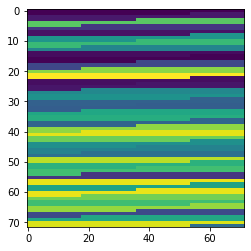

In [61]:
plt.imshow(ans[0])

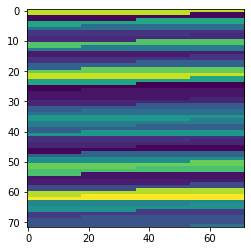

In [60]:
plt.imshow(ans[1])

In [62]:
labels=["558","559","561","565","567","586","587","591","592","594","595","597","598","602","604","605","606",
        "607","610","613","614","616","618","622","624","625","626","627","628"]

In [63]:
def genrate_images(matrices,labels):
    k=0
    for matrix in matrices:
        s=str(labels[k])+"final"+".jpeg"
        plt.imshow(matrix)
        fig1 = plt.gcf()
        fig1.savefig(s, dpi=50)
        k=k+1
    return

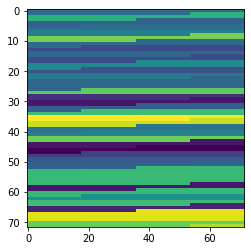

In [64]:
genrate_images(ans,labels)